In [10]:
!pip install kaggle

In [15]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [16]:
!kaggle datasets download -d omkargurav/face-mask-dataset

Dataset URL: https://www.kaggle.com/datasets/omkargurav/face-mask-dataset
License(s): unknown
face-mask-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [17]:
from zipfile import ZipFile
dataset = '/content/face-mask-dataset.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [18]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
from sklearn.model_selection import train_test_split

In [19]:
with_mask_files = os.listdir('/content/data/with_mask')
print(with_mask_files[0:5])
print(with_mask_files[-5:])

['with_mask_2563.jpg', 'with_mask_212.jpg', 'with_mask_459.jpg', 'with_mask_714.jpg', 'with_mask_1698.jpg']
['with_mask_1487.jpg', 'with_mask_1416.jpg', 'with_mask_361.jpg', 'with_mask_1875.jpg', 'with_mask_1666.jpg']


In [20]:
without_mask_files = os.listdir('/content/data/without_mask')
print(without_mask_files[0:5])
print(without_mask_files[-5:])

['without_mask_3391.jpg', 'without_mask_2040.jpg', 'without_mask_2385.jpg', 'without_mask_572.jpg', 'without_mask_2182.jpg']
['without_mask_3174.jpg', 'without_mask_1458.jpg', 'without_mask_1822.jpg', 'without_mask_3761.jpg', 'without_mask_3493.jpg']


In [21]:
print('Number of with mask images:', len(with_mask_files))
print('Number of without mask images:', len(without_mask_files))

Number of with mask images: 3725
Number of without mask images: 3828


In [22]:
with_mask_labels = [1]*3725
without_mask_labels = [0]*3828

In [23]:
print(with_mask_labels[0:5])
print(without_mask_labels[0:5])

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


In [24]:
labels = with_mask_labels + without_mask_labels
print(len(labels))
print(labels[0:5])
print(labels[-5:])

7553
[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


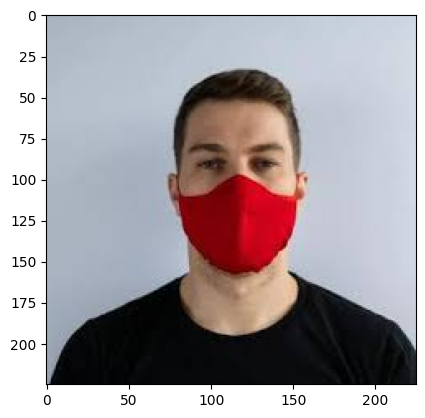

In [27]:
img = mpimg.imread('/content/data/with_mask/with_mask_777.jpg')
imgplot = plt.imshow(img)
plt.show()

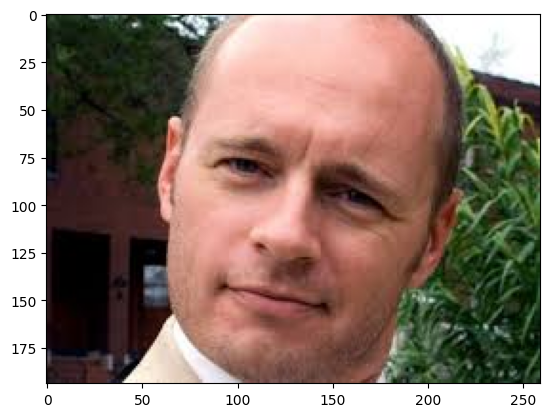

In [30]:
img = mpimg.imread('/content/data/without_mask/without_mask_2333.jpg')
imgplot = plt.imshow(img)
plt.show()

In [31]:
with_mask_path = '/content/data/with_mask/'
data = []
for img_file in with_mask_files:
  image = Image.open(with_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)
without_mask_path = '/content/data/without_mask/'
for img_file in without_mask_files:
  image = Image.open(without_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)

/usr/local/lib/python3.12/dist-packages/PIL/Image.py:1047: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [34]:
type(data)

list

In [35]:
len(data)

7553

array([[[186, 180, 164],
        [186, 180, 164],
        [186, 180, 164],
        ...,
        [202, 196, 180],
        [202, 196, 180],
        [201, 195, 179]],

       [[186, 180, 164],
        [186, 180, 164],
        [186, 180, 164],
        ...,
        [202, 196, 180],
        [202, 196, 180],
        [201, 195, 179]],

       [[186, 180, 164],
        [186, 180, 164],
        [186, 180, 164],
        ...,
        [202, 196, 180],
        [202, 196, 180],
        [201, 195, 179]],

       ...,

       [[ 86,  86,  78],
        [ 81,  81,  73],
        [ 74,  74,  66],
        ...,
        [221, 220, 216],
        [221, 220, 216],
        [220, 219, 215]],

       [[ 72,  72,  64],
        [ 78,  78,  70],
        [ 83,  83,  75],
        ...,
        [220, 219, 215],
        [220, 219, 215],
        [219, 218, 214]],

       [[ 77,  77,  69],
        [ 87,  87,  79],
        [ 99,  99,  91],
        ...,
        [220, 219, 215],
        [219, 218, 214],
        [219, 218, 214]]], dtype=uint8)
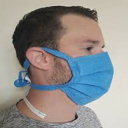

In [37]:
data[0]

In [36]:
type(data[0])

numpy.ndarray

In [38]:
data[0].shape

(128, 128, 3)

In [39]:
X = np.array(data)
Y = np.array(labels)

In [40]:
type(X)

numpy.ndarray

In [41]:
type(Y)

numpy.ndarray

In [42]:
print(X.shape)
print(Y.shape)

(7553, 128, 128, 3)
(7553,)


In [43]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [44]:
print(X.shape, X_train.shape, X_test.shape)

(7553, 128, 128, 3) (6042, 128, 128, 3) (1511, 128, 128, 3)


In [45]:
X_train_scaled = X_train/255
X_test_scaled = X_test/255

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]], dtype=uint8)
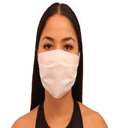

In [46]:
X_train[0]

In [47]:
X_train_scaled[0]

array([[[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       ...,

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]]])

In [48]:
import tensorflow as tf
from tensorflow import keras

In [49]:
num_of_classes = 2
model = keras.Sequential()
model.add(keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))
model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(num_of_classes, activation='sigmoid'))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [50]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

In [51]:
history = model.fit(X_train_scaled, Y_train, validation_split=0.1, epochs=5)

Epoch 1/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 15s 50ms/step - acc: 0.6868 - loss: 0.6615 - val_acc: 0.8843 - val_loss: 0.2882
Epoch 2/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - acc: 0.8806 - loss: 0.3042 - val_acc: 0.8992 - val_loss: 0.2250
Epoch 3/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - acc: 0.9083 - loss: 0.2360 - val_acc: 0.9008 - val_loss: 0.2114
Epoch 4/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - acc: 0.9302 - loss: 0.1972 - val_acc: 0.9339 - val_loss: 0.1793
Epoch 5/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - acc: 0.9314 - loss: 0.1663 - val_acc: 0.9273 - val_loss: 0.1915


In [52]:
loss, accuracy = model.evaluate(X_test_scaled, Y_test)
print('Test Accuracy =', accuracy)

48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - acc: 0.9194 - loss: 0.2611
Test Accuracy = 0.9252150654792786


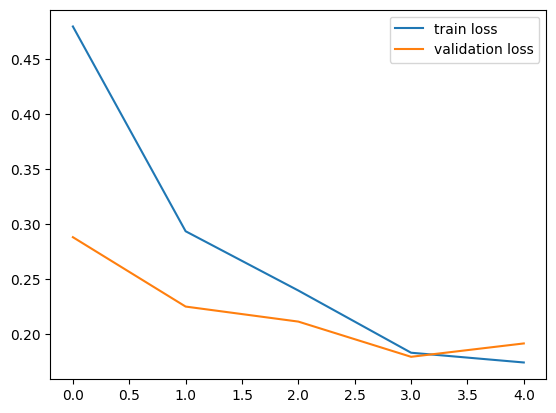

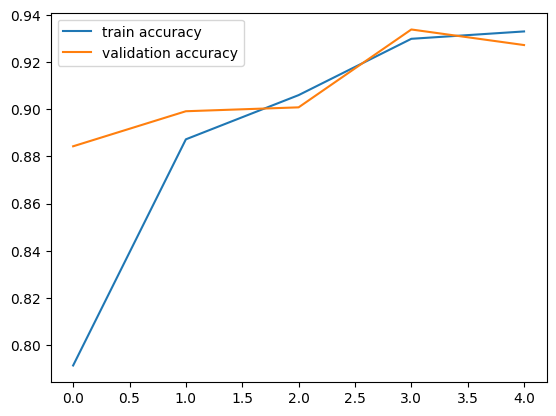

In [53]:
h = history
plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()
plt.plot(h.history['acc'], label='train accuracy')
plt.plot(h.history['val_acc'], label='validation accuracy')
plt.legend()
plt.show()

Path of the image to be predicted: /content/testing.jpg


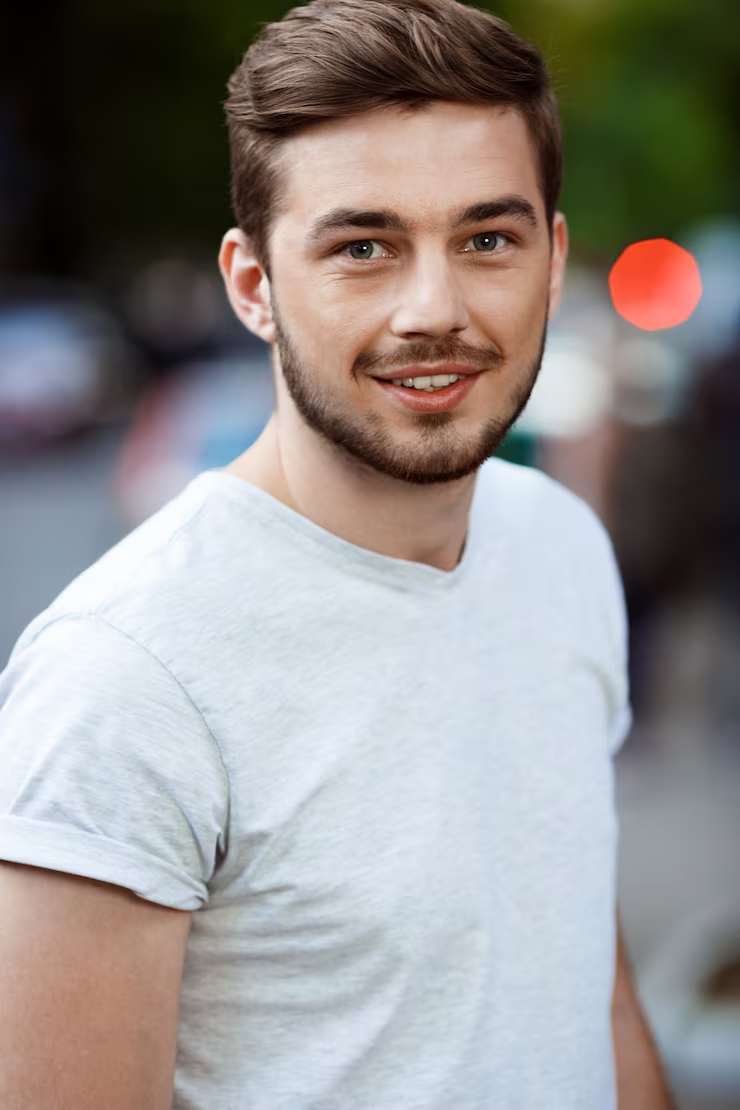

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
[[0.54788154 0.5236875 ]]
0
The person in the image is not wearing a mask


In [57]:
input_image_path = input('Path of the image to be predicted: ')
input_image = cv2.imread(input_image_path)
cv2_imshow(input_image)
input_image_resized = cv2.resize(input_image, (128,128))
input_image_scaled = input_image_resized/255
input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])
input_prediction = model.predict(input_image_reshaped)
print(input_prediction)
input_pred_label = np.argmax(input_prediction)
print(input_pred_label)
if input_pred_label == 1:
  print('The person in the image is wearing a mask')
else:
  print('The person in the image is not wearing a mask')

Path of the image to be predicted: /content/testimage.jpg


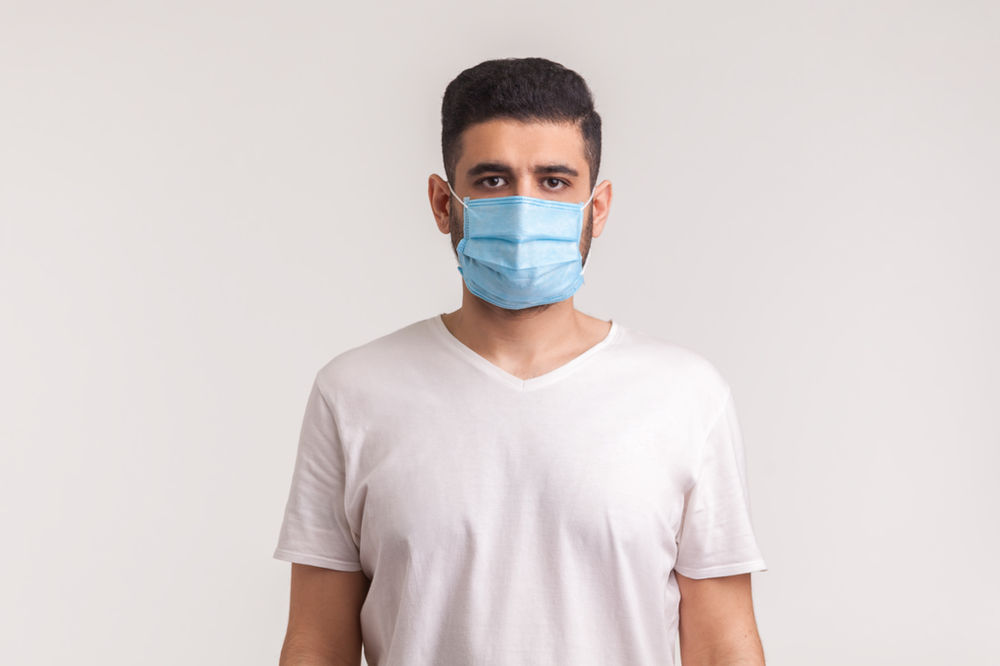

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
[[0.39750183 0.6304214 ]]
1
The person in the image is wearing a mask


In [58]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)


input_pred_label = np.argmax(input_prediction)

print(input_pred_label)


if input_pred_label == 1:

  print('The person in the image is wearing a mask')

else:

  print('The person in the image is not wearing a mask')